## SENTIMENT REVIEW MODEL FOR AMAZON PRODUCTS

#### OBJECTIVE AND GOAL

The objective is to build a sentiment review model to clasify product reviews as psitive, negative, or neutral.

The goal is to automatically analyze and categorize customer feedback to help business understand customer sentiment and improve product offerings.

#### Import Important Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [210]:
# Converts a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.
#It transforms text to feature vectors that can be used as input to machine learning algorithms.
#is a numerical statistic intended to reflect how important a word is to a document in a collection 
from sklearn.feature_extraction.text import TfidfVectorizer

#Converts a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

#NLTK is a leading platform for building Python programs to work with human language data (natural language processing).
#Stopwords are common words (like "and", "the", "is") 
#that are usually filtered out in text processing because they do not carry significant meaning.
from nltk.corpus import stopwords

#Provides an implementation of the Porter stemming algorithm
#temming is the process of reducing words to their base or root form. For example, "running" becomes "run".
#Used to standardize words in text processing, making it easier to analyze the text.
from nltk.stem import PorterStemmer

#The wordcloud library is used for visualizing text data in the form of word clouds, 
#where the size of each word indicates its frequency or importance.
from wordcloud import WordCloud, STOPWORDS

#these are uility libraries
#tring is Often used to remove punctuation from text data.
import string

#Provides support for regular expressions, which are a powerful tool for matching patterns in text
import re



SUMMARY

These libraries and modules together provide a robust toolkit for text preprocessing and feature extraction, which are crucial steps in natural language processing (NLP) and text analysis. 

In [4]:
#Splits the dataset into training and testing sets.
#It is essential to evaluate the performance of a machine learning model
from sklearn.model_selection import train_test_split

#Converts categorical labels into numerical values.
from sklearn.preprocessing import LabelEncoder

#these are performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix

#A linear model used for binary classification tasks.
#Suitable for predicting binary outcomes (e.g., positive vs. negative sentiment) 
from sklearn.linear_model import LogisticRegression

#A probabilistic classifier based on Bayes' theorem, commonly used for text classification.
#effective for classification tasks involving discrete features, like word counts in text data
from sklearn.naive_bayes import MultinomialNB

### DATA PREPARATION CLEANING

**LOAD DATA**

In [214]:
data = pd.read_csv('Amazon-Product-Reviews - Amazon Product Review (1).csv')
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


**Number of Rows and Columns**

In [165]:
data.shape

(30846, 16)

**List of columns**

In [166]:
data.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')

**Select Review_headline and Star_rating columns**

In [167]:
#Selection of the variables for the analysis
data1 = data[['review_headline', 'star_rating']]
data1.head()

,review_headline,star_rating
0,Five Stars,5
1,Lots of ads Slow processing speed Occasionally...,3
2,Well thought out device,5
3,Not all apps/games we were looking forward to ...,4
4,Five Stars,5


**Count of each Star_rating**

5    20019
4     5748
3     2216
1     1708
2     1155
Name: star_rating, dtype: int64

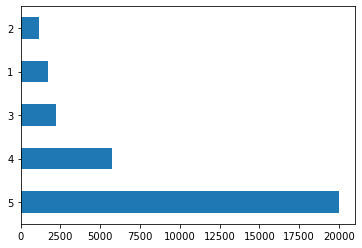

In [168]:
data1.star_rating.value_counts().plot(kind = 'barh')
data1.star_rating.value_counts()

**Check Missing Values and Duplicate values**

In [169]:
data1.isnull().sum()

review_headline    0
star_rating        0
dtype: int64

In [170]:
data1[data1.duplicated()]

,review_headline,star_rating
4,Five Stars,5
7,Five Stars,5
10,Five Stars,5
12,Five Stars,5
14,Five Stars,5
...,...,...
30817,First Kindle,5
30819,Five Stars,5
30822,Five Stars,5
30832,Four Stars,4


**Drop Duplicate**

In [171]:
data2 = data1.drop_duplicates()

In [172]:
data2.shape

(16156, 2)

In [173]:
data2.star_rating.value_counts()

5    8623
4    3524
3    1702
1    1369
2     938
Name: star_rating, dtype: int64

**Positive, Negative and Neutral Reviews Mapping**

In [174]:
#function defination that maps numerical star ratings to categorical sentiment labels ("Negative", "Neutral", "Positive")
def map_review(x):
    if x < 3:
        return 'Negative'
    elif x == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [175]:
#Mapping Star Ratings to Sentiment Labels in a DataFrame
data2['Review'] = data2['star_rating'].apply(lambda x : map_review(x))

<ipython-input-175-c29091c8218b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Review'] = data2['star_rating'].apply(lambda x : map_review(x))


In [213]:
data2.head()

,review_headline,star_rating,Review
0,Five Stars,5,Positive
1,Lots of ads Slow processing speed Occasionally...,3,Neutral
2,Well thought out device,5,Positive
3,Not all apps/games we were looking forward to ...,4,Positive
5,Four Stars,4,Positive


In [177]:
#checking number of positive, Negative and Neutral reviews
data2.Review.value_counts()

Positive    12147
Negative     2307
Neutral      1702
Name: Review, dtype: int64

**Explanation of Review Distribution and Potential Bias**

The data set is not balance and an imbalanced dataset can cause training bias, making the model favor predicting positive reviews due to their higher count. Performance metrics like accuracy can be misleading, as the model may incorrectly classify negative and neutral reviews while still appearing accurate. This bias reduces the model's ability to generalize well to real-world data with a more balanced or different distribution.

To overcome bias from imbalanced data, use resampling techniques (oversampling minority classes, undersampling majority classes), adjust class weights in your model, apply data augmentation, treat minority classes as anomalies, and use informative evaluation metrics like Precision, Recall, F1-Score, and ROC-AUC.

**Resample to Balance the Data set**

In [178]:
import pandas as pd

#Useful for handling imbalanced datasets by upsampling or downsampling classes to balance the dataset
from sklearn.utils import resample

In [179]:
# Separate the classes
positive_reviews = data2[data2['Review'] == 'Positive']
negative_reviews = data2[data2['Review'] == 'Negative']
neutral_reviews = data2[data2['Review'] == 'Neutral']

# Oversample the minority classes
negative_oversampled = resample(negative_reviews, 
                                replace=True,     # sample with replacement
                                n_samples=len(positive_reviews),    # to match positive class
                                random_state=123) # reproducible results

neutral_oversampled = resample(neutral_reviews, 
                               replace=True,     # sample with replacement
                               n_samples=len(positive_reviews),    # to match positive class
                               random_state=123) # reproducible results

# Combine the oversampled classes with the majority class
oversampled_data2 = pd.concat([positive_reviews, negative_oversampled, neutral_oversampled])

# Check the new class distribution
print(oversampled_data2['Review'].value_counts())


Positive    12147
Negative    12147
Neutral     12147
Name: Review, dtype: int64


**Text Cleaning and Preprocessing**

In [180]:
import nltk
from stop_words import get_stop_words
stopwords = get_stop_words('english')

In [181]:
# stopwords
total_stopwords = set(stopwords)

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords
                         if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

final_stopwords.add("one")
print(final_stopwords)

{"there's", 'itself', 'all', 'her', 'off', 'to', "he's", 'from', 'of', 'both', "she'll", 'you', 'he', 'the', "they'd", 'was', "she'd", 'own', 'doing', 'him', "what's", "we'd", 'same', 'while', 'had', 'your', 'which', "they're", 'as', 'again', "she's", 'his', "you're", 'too', "he'd", 'an', 'be', 'ought', 'whom', 'she', 'further', 'a', 'if', 'very', 'before', "when's", "you'd", 'being', 'should', 'why', "i'm", 'other', 'themselves', 'them', 'above', 'during', 'does', 'against', 'could', 'because', 'in', "they'll", "that's", "how's", 'has', 'each', 'about', 'having', 'on', 'our', 'after', 'but', "you've", "we've", 'how', 'with', 'into', 'where', "where's", 'been', "he'll", 'we', 'here', 'it', 'ours', 'theirs', 'its', 'myself', 'so', 'this', 'until', "i'd", 'did', 'those', 'that', "you'll", "let's", 'me', 'have', 'most', 'is', 'my', 'for', 'they', 'were', 'some', 'by', 'yourselves', 'ourselves', 'up', 'than', "why's", "we're", 'there', 'over', 'out', 'i', 'what', 'or', 'one', 'and', 'under

The code snippet imports the nltk library and the get_stop_words function from the stop_words package to retrieve a list of English stop words. These stop words can then be used to preprocess text data by removing common, insignificant words, helping to reduce noise in natural language processing tasks.

NB:Stop words are common words in a language (like "and", "the", "is", etc.) that are usually filtered out before processing textual data in natural language processing (NLP) tasks. These words are often removed because they do not contain significant meaning and can introduce noise into text analysis.

In [182]:
#stemming object
stemmer = PorterStemmer()

HTMLTAGS = re.compile(r'<.*?>')

table = str.maketrans(dict.fromkeys(string.punctuation))

remove_digits = str.maketrans('', '', string.digits)

MULTIPLE_WHITESPACE = re.compile(r'\s+')

NB: Stemming reduces words to their base or root form, which can help in text analysis by treating similar words as the same.

These objects and regular expressions facilitate text preprocessing for natural language processing (NLP) tasks and machine learning algorithms. They aid in cleaning textual data by removing HTML tags, punctuation, digits, and normalizing whitespaces, preparing the text for analysis.

In [183]:
def Text_preprocessor(review):
    #remove html tags
    review = HTMLTAGS.sub(r' ', review)
    
    #remove punctuation
    review = review.translate(table)
    
    #remove digits
    review = review.translate(remove_digits)
    
    #lower case all letters
    review = review.lower()
    
    #replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    
    #remove stop words
    review = [word for word in review.split()
             if word not in final_stopwords]
    
    #stemming
    review = ' '.join({stemmer.stem(word) for word in review})
    
    return review

The purpose of this function is to preprocess textual data by cleaning it, normalizing it, and reducing it to a more structured form suitable for NLP tasks like sentiment analysis, topic modeling, or text classification.

In [184]:
text = 'coffee is very weak, I have to use 3 packs to make 4 cups of coffee   .'

In [185]:
Text_preprocessor(text)

'coffe pack use weak cup make'

**WordCloud**

In [186]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    
    plt.figure(figsize=(15, 7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

The purpose of this function is to provide a convenient way to visualize the frequency distribution of words in a given text using a word cloud. It's commonly used in text analysis to quickly identify the most frequent words or terms in a corpus of text.

**Positive Review Word Cloud**

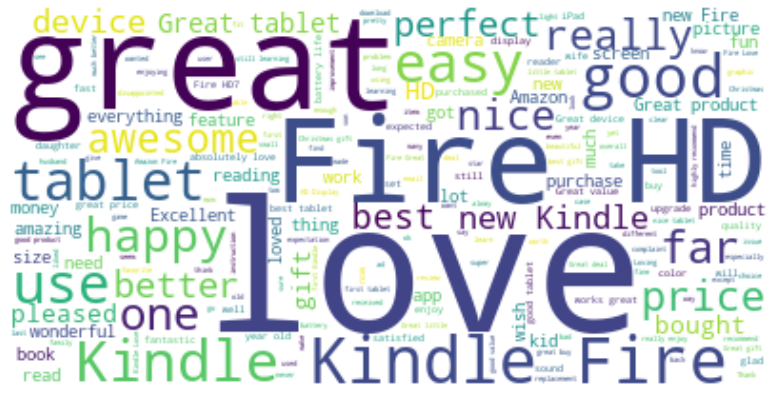

In [110]:
#This is to produce a word cloud visualization showing the frequency distribution of positive review in the oversampled_data2
Pos = oversampled_data2.loc[oversampled_data2.Review =="Positive"].review_headline
text = " ".join(review for review in Pos.astype(str))

generate_wcloud(text)

**Nagative Review Word Cloud**

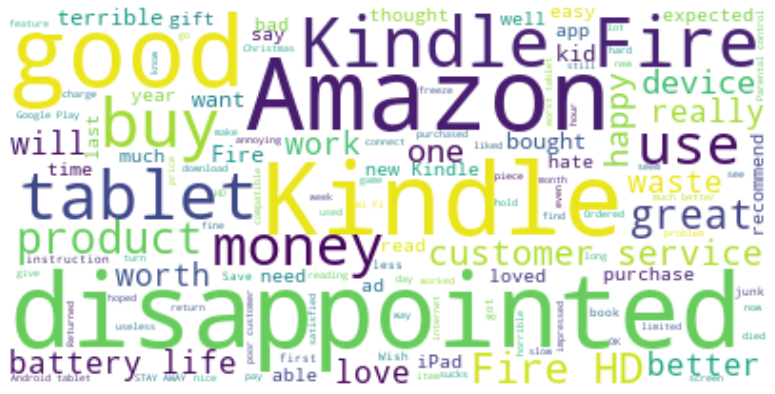

In [111]:
#This is to produce a word cloud visualization showing the frequency distribution of negative review in the oversampled_data2
Neg = oversampled_data2.loc[oversampled_data2.Review =="Negative"].review_headline
text = " ".join(review for review in Neg.astype(str))

generate_wcloud(text)

**Neutral Review Word Cloud**

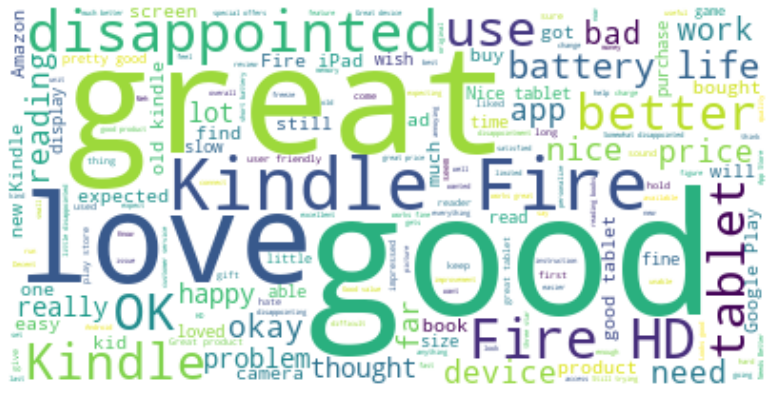

In [112]:
#This is to produce a word cloud visualization showing the frequency distribution of neutral review in the oversampled_data2
Neut = oversampled_data2.loc[oversampled_data2.Review =="Neutral"].review_headline
text = " ".join(review for review in Neut.astype(str))

generate_wcloud(text)

**Splitting the data into training and testing**

In [187]:
# Splitting the oversampled data into training and testing sets with stratification to preserve class distribution
x = oversampled_data2.review_headline
y = oversampled_data2.Review

x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size = 0.2, random_state = 1, stratify=y)

In [188]:
x_train.shape, x_test.shape

((29152,), (7289,))

**CountVectorizer**

In [189]:
# Create and fit a Bag of Words (BoW) vectorizer with a maximum of 10,000 features based on the training data,
# then transform both the training and testing data into BoW representations.
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(x_train)

# transform
bow_x_train = bow_vectorizer.transform(x_train)
bow_x_test = bow_vectorizer.transform(x_test)

In [190]:
bow_x_train

<29152x4323 sparse matrix of type '<class 'numpy.int64'>'
	with 184537 stored elements in Compressed Sparse Row format>

**TfidfVectorizer**

In [191]:
# Create and fit a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer with a maximum of 
#10,000 features based on the training data,
# then transform both the training and testing data into TF-IDF representations.

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train)

# transform
tfidf_x_train = tfidf_vectorizer.transform(x_train)
tfidf_x_test = tfidf_vectorizer.transform(x_test)

In [192]:
tfidf_x_train 

<29152x4323 sparse matrix of type '<class 'numpy.float64'>'
	with 184537 stored elements in Compressed Sparse Row format>

NB: BoW focuses on word counts, while TF-IDF focuses on the importance of words.
Both approaches have their use cases in different scenarios, depending on the nature of the text data and the requirements of the machine learning task.

**Label Encoder**

In [193]:
# Initialize a LabelEncoder object to encode categorical target labels into numerical representations
labelEncoder = LabelEncoder()

# Fit and transform the training labels to numerical values.
y_train = labelEncoder.fit_transform(y_train)

# Transform the testing labels to numerical values using the same encoder
y_test = labelEncoder.transform(y_test)

# Get the list of unique classes (labels) and convert them to a list.
labels = labelEncoder.classes_.tolist()

# Print the list of labels where the index corresponds to the class.
print(labels) #index -> class

['Negative', 'Neutral', 'Positive']


Label Encoder is typically used when dealing with classification tasks, where the target labels are categorical. Label encoding is a necessary preprocessing step to convert these categorical labels into a format that machine learning algorithms can understand and process effectively. The resulting numerical representations can then be used to train and evaluate machine learning models.

### MODEL SELECTION

**Model Training and Evaluation**

In [120]:
def train_and_eval(model, trainX, trainY, testX, testY):
    
    # training
    model.fit(trainX, trainY)
    
    #predictions
    y_preds_train = model.predict(trainX)
    y_preds_test  = model.predict(testX)
    
    #evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

This function is a utility function commonly used in machine learning workflows. It simplifies the process of training a model, making predictions, and evaluating its performance on both training and testing datasets. By encapsulating these steps into a single function, it promotes code reusability and readability, especially when experimenting with different models or datasets.

**Logistic Regression with Hyperparameter & Countvectorizer**

In [121]:
#Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C:
    #Define model
    log_model = LogisticRegression(C=c, max_iter=1000, random_state=1)
    
    #Train and evaluate model
    train_and_eval(model=log_model,
                  trainX=bow_x_train,
                  trainY=y_train,
                  testX=bow_x_test,
                  testY=y_test)
    


LogisticRegression(C=0.001, max_iter=1000, random_state=1)
Train accuracy score : 0.5875068605927553
Test accuracy score : 0.5745644121278639

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=1000, random_state=1)
Train accuracy score : 0.6725439077936334
Test accuracy score : 0.6550967210865688

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=1000, random_state=1)
Train accuracy score : 0.7696555982436882
Test accuracy score : 0.7389216627795308

 ----------------------------------------

LogisticRegression(C=1, max_iter=1000, random_state=1)
Train accuracy score : 0.8351056531284303
Test accuracy score : 0.8007957195774454

 ----------------------------------------

LogisticRegression(C=10, max_iter=1000, random_state=1)
Train accuracy score : 0.8609014818880352
Test accuracy score : 0.8200027438606119

 ----------------------------------------


This code snippet is performing hyperparameter tuning for a logistic regression model using cross-validation. Here, C is a list containing different values for the regularization parameter C. Regularization is used to prevent overfitting in machine learning models, and C controls the strength of regularization.


**Naive-Bays Model - Hyperparameters & Countvectorizer**

In [122]:
# Define a list of different values for the Laplace smoothing parameter (alpha) used in Multinomial Naive Bayes
alphas = [1.0e-10, 0.2, 0.6, 0.8, 1]

for a in alphas:
    # Define model with adjusted alpha value
    nb_model = MultinomialNB(alpha=a)
    
    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=bow_x_train,
                   trainY=y_train,
                   testX=bow_x_test,
                   testY=y_test)


MultinomialNB(alpha=1e-10)
Train accuracy score : 0.7776138858397366
Test accuracy score : 0.7426258746055701

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.7691753567508233
Test accuracy score : 0.7361778021676498

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.763172338090011
Test accuracy score : 0.7312388530662642

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.7595705268935236
Test accuracy score : 0.727671834270819

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7566547749725576
Test accuracy score : 0.7235560433529976

 ----------------------------------------


This code snippet performs hyperparameter tuning for a Multinomial Naive Bayes (NB) model using cross-validation.

The code systematically tunes the Laplace smoothing parameter alpha for the Multinomial Naive Bayes model, optimizing its performance on testing data. By iterating over alpha values, it automates training and evaluation, enhancing the model's generalization. This approach streamlines the process of hyperparameter optimization, crucial for improving model accuracy and robustness.

**Logistic Regression with Hyperparameter & TfidfVectorizer**

In [123]:
#Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C:
    #Define model
    log_model = LogisticRegression(C=c, max_iter=1000, random_state=1)
    
    #Train and evaluate model
    train_and_eval(model=log_model,
                  trainX=tfidf_x_train,
                  trainY=y_train,
                  testX=tfidf_x_test,
                  testY=y_test)


LogisticRegression(C=0.001, max_iter=1000, random_state=1)
Train accuracy score : 0.598140779363337
Test accuracy score : 0.5873233639731101

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=1000, random_state=1)
Train accuracy score : 0.6390985181119648
Test accuracy score : 0.6272465358759775

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=1000, random_state=1)
Train accuracy score : 0.7336031833150384
Test accuracy score : 0.7113458636301276

 ----------------------------------------

LogisticRegression(C=1, max_iter=1000, random_state=1)
Train accuracy score : 0.8148326015367727
Test accuracy score : 0.7832350116614076

 ----------------------------------------

LogisticRegression(C=10, max_iter=1000, random_state=1)
Train accuracy score : 0.850576289791438
Test accuracy score : 0.8077925641377418

 ----------------------------------------


**Naive-Bays Model - Hyperparameters & TfidfVectorizer**

In [124]:
# Define a list of different values for the Laplace smoothing parameter (alpha) used in Multinomial Naive Bayes
alphas = [1.0e-10, 0.2, 0.6, 0.8, 1]

for a in alphas:
    # Define model with adjusted alpha value
    nb_model = MultinomialNB(alpha=a)
    
    #Train and evaluate model
    train_and_eval(model=nb_model,
                  trainX=tfidf_x_train,
                  trainY=y_train,
                  testX=tfidf_x_test,
                  testY=y_test)


MultinomialNB(alpha=1e-10)
Train accuracy score : 0.7809412733260154
Test accuracy score : 0.7449581561256688

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.7754871020856202
Test accuracy score : 0.7423514885443819

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.7678032381997805
Test accuracy score : 0.7371381533818082

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.7658479692645445
Test accuracy score : 0.7357662230758677

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7631037321624589
Test accuracy score : 0.733571134586363

 ----------------------------------------


**Best Model: LogisticRegression(C=10) with Countvectorizer**

In [125]:
bmodel = LogisticRegression(C=10, max_iter=1000, random_state=1)
bmodel.fit(bow_x_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=1)

In [126]:
#predictions
y_preds_train = bmodel.predict(bow_x_train)
y_preds_test = bmodel.predict(bow_x_test)

In [127]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.8609014818880352
Test accuracy score : 0.8200027438606119


LogisticRegression(C=10) with Countvectorizer has higher accuracy scores for both the training and testing datasets, indicating better performance in terms of classification accuracy. 

It also maintain a minimum level of overfiiting 

In [128]:
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
       cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
       xticklabels=labels, yticklabels=labels)
    
    return plt.show()

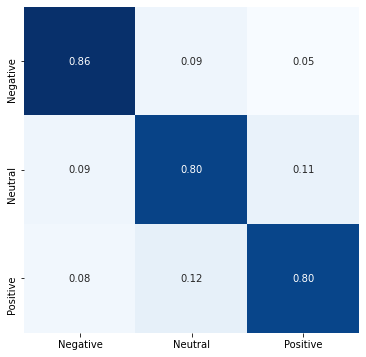

In [129]:
plot_cm(y_test, y_preds_test)

**Save Model and Transformer**

In [130]:
import pickle

In [205]:
#This is to save the Vectorizer and the Model
with open("transformer.pkl", "wb") as f:
    pickle.dump(bow_vectorizer, f)
    
with open("Sentiment.Predict.Model.pkl", "wb") as f:
    pickle.dump(bmodel, f)

**Prediction and classification on review**

In [206]:
#labels = ['Negative', 'Neutral', 'Positive']
def get_sentiment(review):
    #preprocessing
    x = Text_preprocessor(review)
    #vectorization
    x=tfidf_vectorizer.transform([x])
    #prediction
    y= int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [207]:
#positive review
review = "This is a good product, i recommend it!"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [208]:
#Negative review
review = "I don't like this product, but the product is good !!"
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!


In [209]:
# Neutral review
review = "The product quality is good. I had high expectations, but it failed to meet my expectation."
print(f"This is a {get_sentiment(review)} review!")


This is a Neutral review!
